Nama  : Khalilullah Al Faath

Kelas : IF-44-08

NIM   : 1301204376

In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [73]:
# Membaca data set
data = pd.read_csv("https://github.com/khalilullahalfaath/Belajar-AI/blob/dfd9697972cf2c88638219a51d64bec1faf3b418/pertemuan1/tugas/Iris.csv?raw=true")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [74]:
# deskripsi data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [75]:
# pengecekan ke-NULL-an
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [76]:
# cara lain pengecekan banyak data NULL
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Feature Scaling

Feature scaling is one of the most important data preprocessing step in machine learning. Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled.(sumber: https://www.geeksforgeeks.org/normalization-vs-standardization/)

## Normalization

Normalisasi adalah upaya untuk mengubah nilai dari data ke dalam skala dengan range dari 0 sampai 1 atau dari -1 sampai 1. Hal ini dilakukan untuk memudahkan pengaksesan data yang memiliki perbedaan skala.

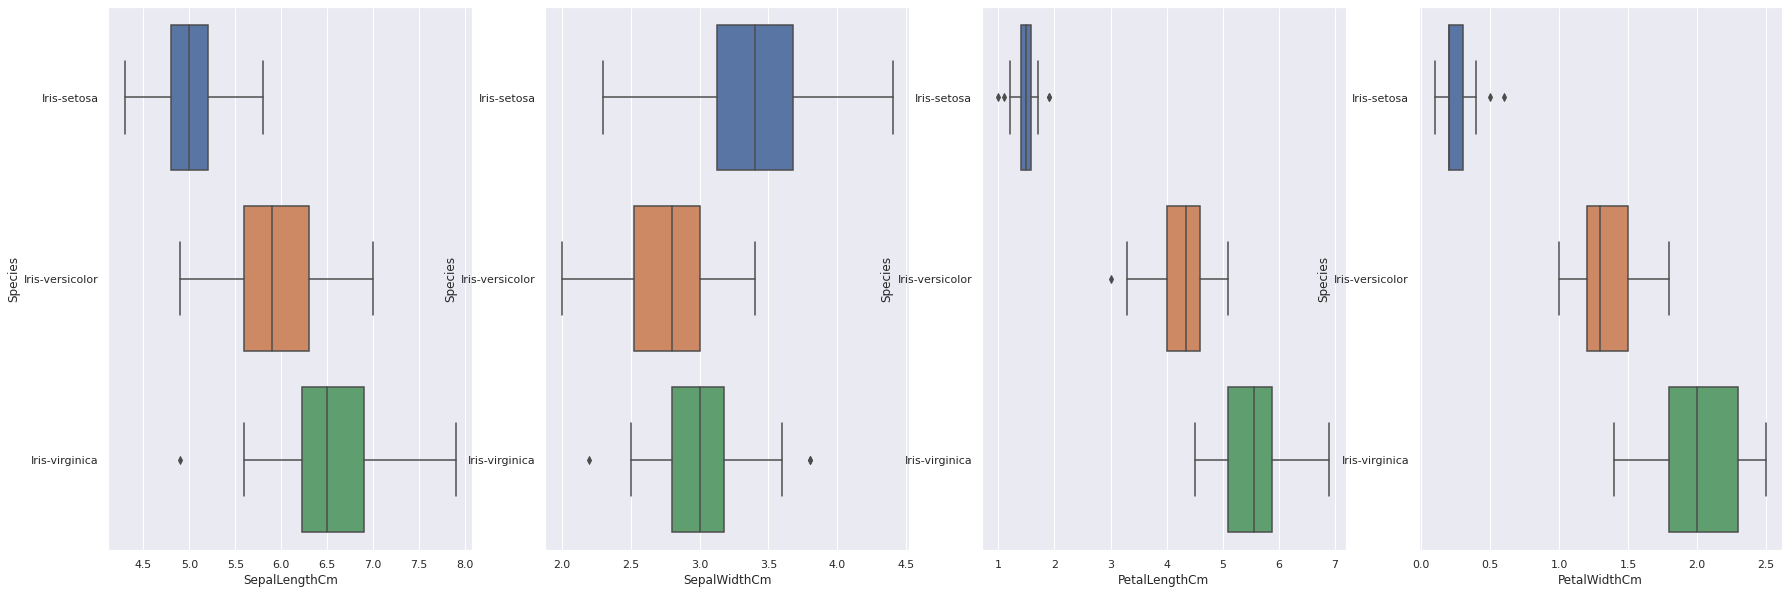

In [77]:
fig, axs = plt.subplots(ncols=4)
sns.set(rc={'figure.figsize':(30,10)})
sns.boxplot(x = "SepalLengthCm", y = "Species", data = data, ax=axs[0])
sns.boxplot(x = "SepalWidthCm", y = "Species", data = data, ax=axs[1])
sns.boxplot(x = "PetalLengthCm", y = "Species", data = data, ax=axs[2])
sns.boxplot(x = "PetalWidthCm", y = "Species", data = data, ax=axs[3])

Dapat dilihat dari boxplot di atas bahwa terdapat beberapa outlier untuk tiap variable. Untuk normalisasi, ini akan sangat berpengaruh. Oleh karena itu, disarankan untuk menghapus outliers terlebih dahulu sebelum melakukan normalisasi

## Menghapus outliers

### Deteksi Outliers

by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers
sumber: https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

In [78]:
# deteksi outliers dengan menggunakan IQR (Interquartile Range)

def findOutliers(df):
    out = []

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3-Q1

    Lower_tail = Q1 - 1.5 * IQR
    Upper_tail = Q3 + 1.5 * IQR

    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)

    print("Outliers:",out)
    
findOutliers(data['SepalLengthCm'])
findOutliers(data['SepalWidthCm'])
findOutliers(data['PetalLengthCm'])
findOutliers(data['PetalWidthCm'])

Outliers: []
Outliers: [4.4, 4.1, 4.2, 2.0]
Outliers: []
Outliers: []


### Boxplot setelah outliers dihapus

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


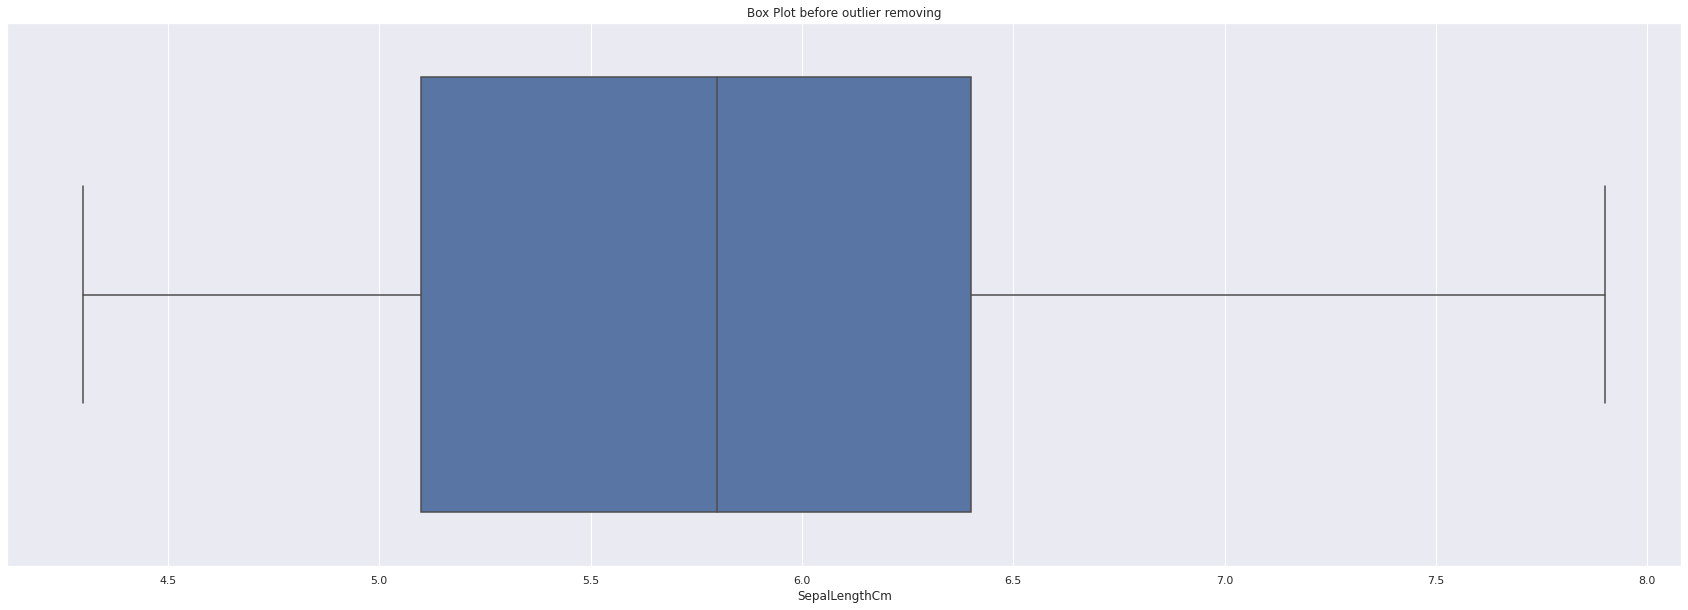

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


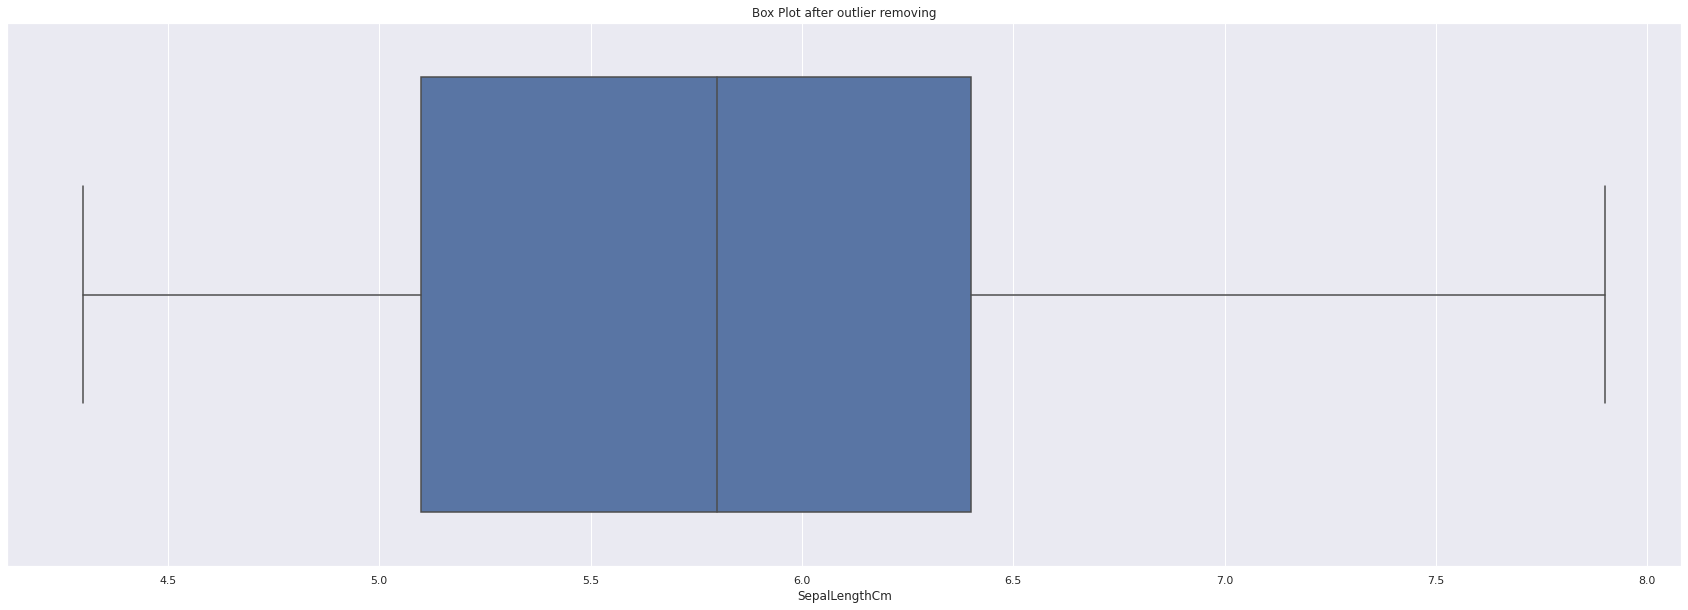

In [79]:
# copy isi data
data_baru = data

sns.boxplot(data_baru["SepalLengthCm"])
plt.title("Box Plot before outlier removing")
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
    
drop_outliers(data_baru, 'SepalLengthCm')
sns.boxplot(data_baru['SepalLengthCm'])
plt.title("Box Plot after outlier removing")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


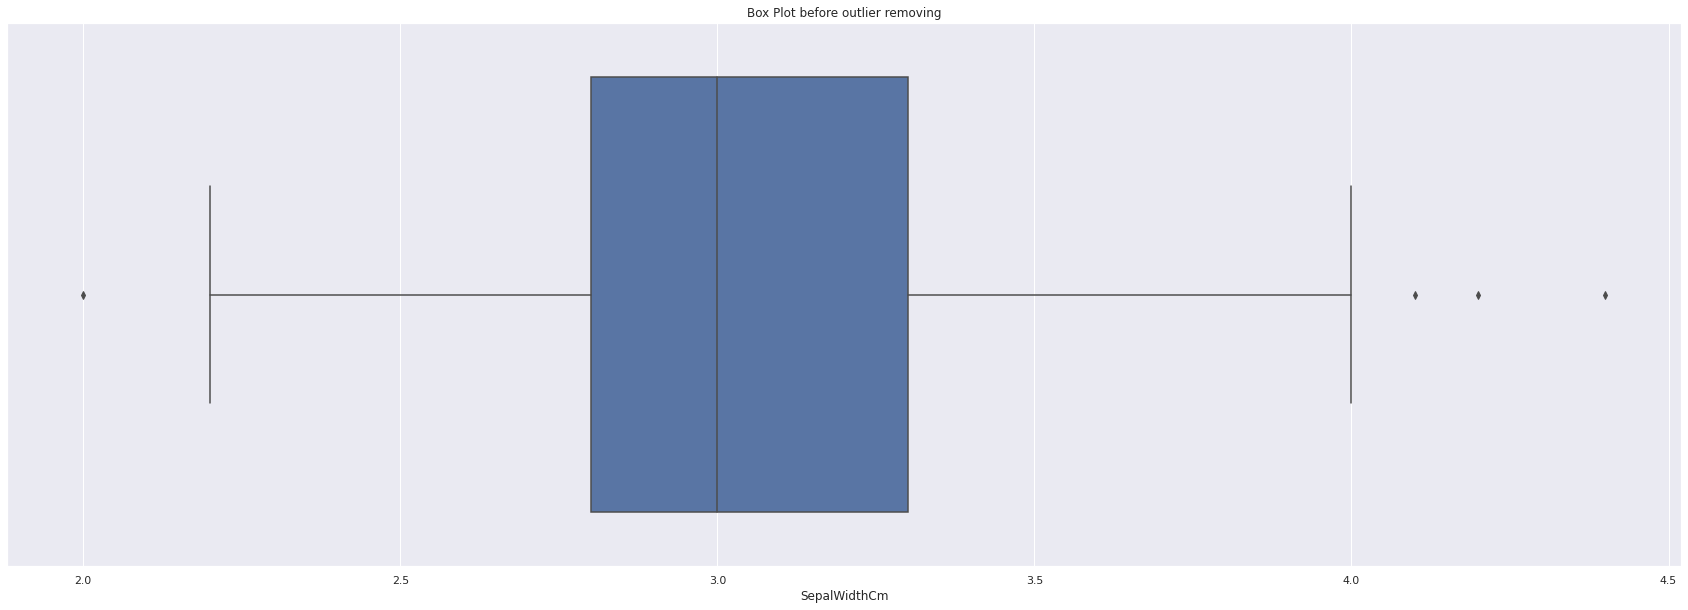

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


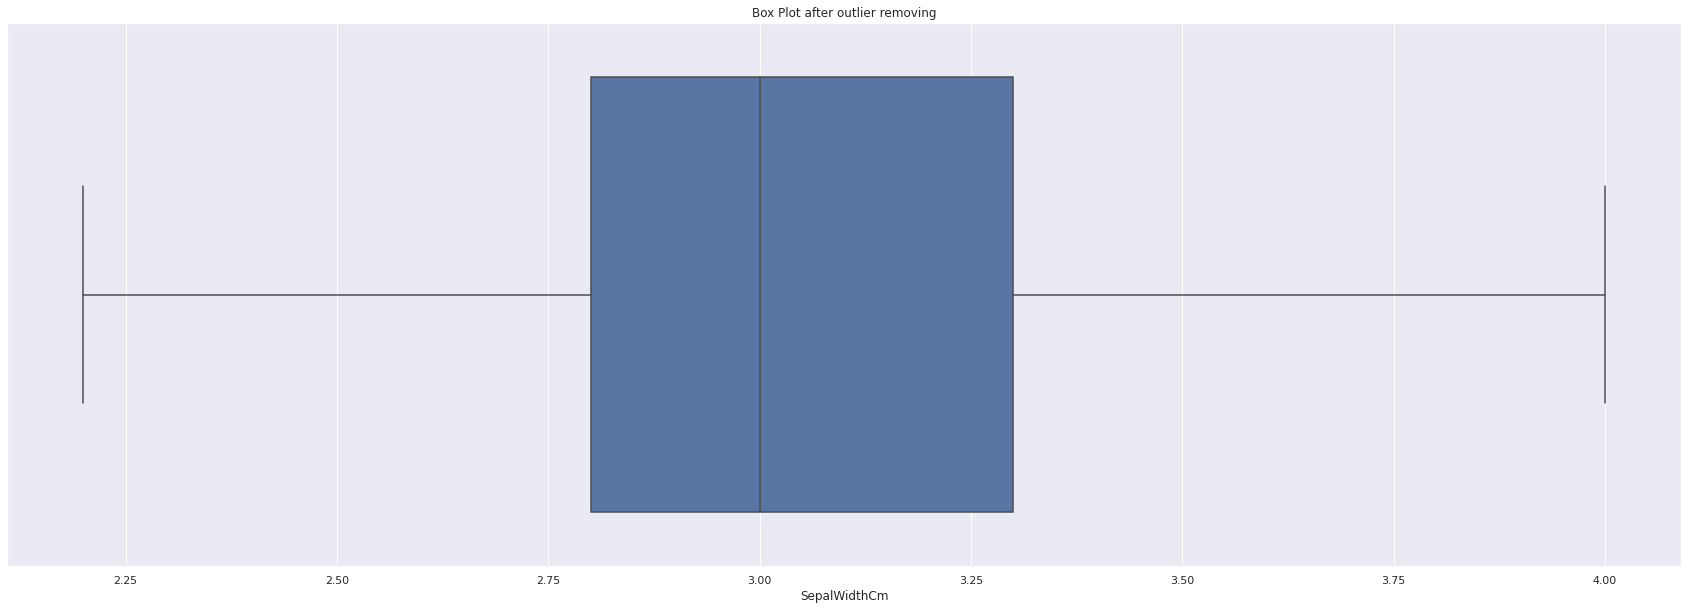

In [80]:
sns.boxplot(data_baru["SepalWidthCm"])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(data_baru, 'SepalWidthCm')
sns.boxplot(data_baru['SepalWidthCm'])
plt.title("Box Plot after outlier removing")
plt.show()

In [81]:
data_baru.shape

(146, 6)

Dapat dilihat bahwa ada 4 buah data yang didrop karena merupakan outliers

# Melakukan Normalisasi


Berikut adalah salah satu cara untuk normalisasi, yaitu dengan menggunakan min-max scaling

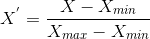

In [82]:
data_baru_tanpa_species = data_baru
from sklearn.preprocessing import MinMaxScaler
data_baru_tanpa_species.drop("Species",axis=1,inplace=True)
scaler=MinMaxScaler()
data_baru1=pd.DataFrame(scaler.fit_transform(data_baru_tanpa_species),columns=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

In [83]:
data_baru1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.000000,0.222222,0.722222,0.067797,0.041667
1,0.006711,0.166667,0.444444,0.067797,0.041667
2,0.013423,0.111111,0.555556,0.050847,0.041667
3,0.020134,0.083333,0.500000,0.084746,0.041667
4,0.026846,0.194444,0.777778,0.067797,0.041667
...,...,...,...,...,...
141,0.973154,0.666667,0.444444,0.711864,0.916667
142,0.979866,0.555556,0.166667,0.677966,0.750000
143,0.986577,0.611111,0.444444,0.711864,0.791667
144,0.993289,0.527778,0.666667,0.745763,0.916667


In [84]:
data_baru1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.507263,0.432458,0.464992,0.475853,0.466610
std,0.291633,0.231693,0.219525,0.297816,0.316819
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.263423,0.222222,0.333333,0.101695,0.083333
50%,0.513423,0.416667,0.444444,0.576271,0.500000
75%,0.756711,0.583333,0.611111,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Boxplot setelah scaling

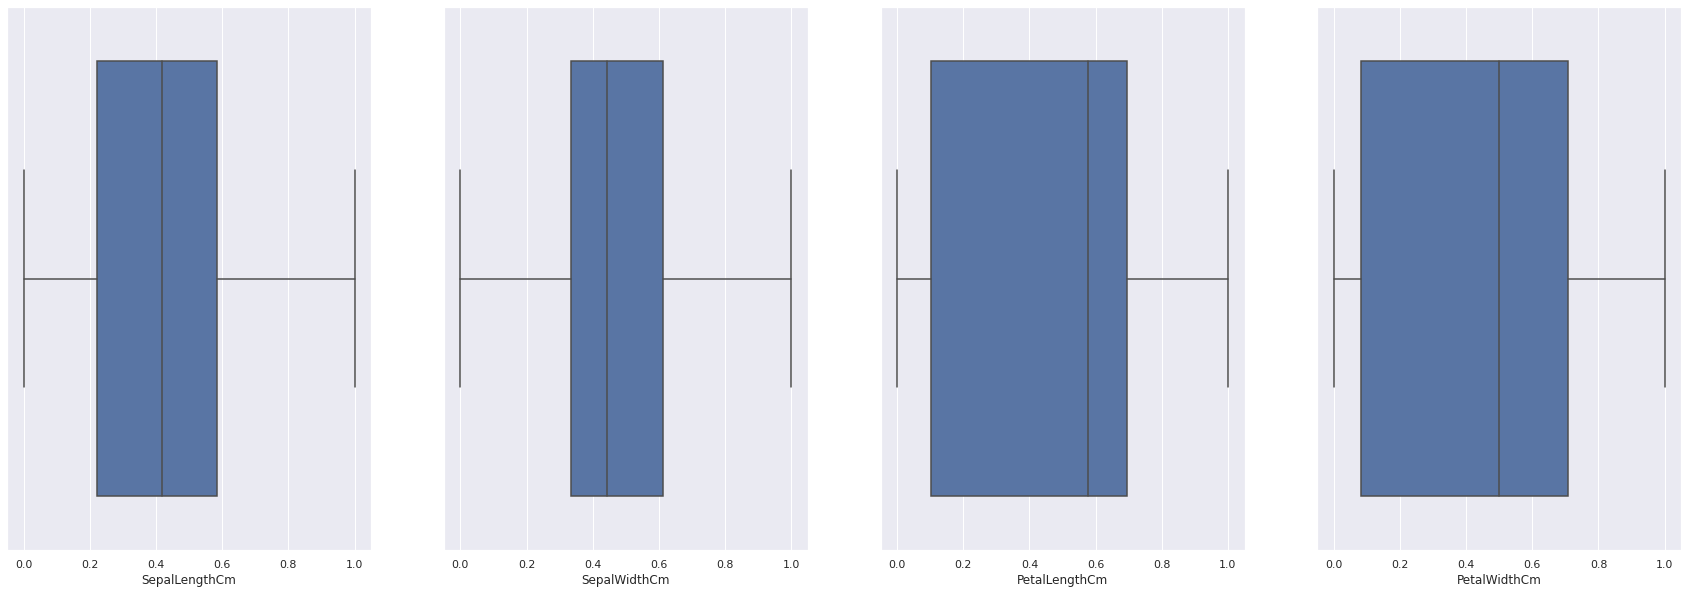

In [85]:
fig, axs = plt.subplots(ncols=4)
sns.set(rc={'figure.figsize':(30,10)})
sns.boxplot(x = "SepalLengthCm",data = data_baru1, ax=axs[0])
sns.boxplot(x = "SepalWidthCm", data = data_baru1, ax=axs[1])
sns.boxplot(x = "PetalLengthCm", data = data_baru1, ax=axs[2])
sns.boxplot(x = "PetalWidthCm", data = data_baru1, ax=axs[3])

# Standarisasi

Standarisasi adalah tehnik lain dalam melakukan perubahan skala, dimana data yang dimiliki akan diubah sehingga memiliki rata rata = 0 (terpusat) dan standar deviasi = 1. (sumber: https://anzihory.medium.com/normalisasi-vs-standarisasi-101093633e18)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_baru2=pd.DataFrame(scaler.fit_transform(data_baru_tanpa_species),columns=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

In [87]:
data_baru2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.745376,-0.910515,1.175789,-1.374878,-1.345899
1,-1.722284,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.699192,-1.391729,0.413961,-1.431986,-1.345899
3,-1.676099,-1.512032,0.160019,-1.317771,-1.345899
4,-1.653007,-1.030819,1.429732,-1.374878,-1.345899
...,...,...,...,...,...
141,1.603026,1.014339,-0.093924,0.795200,1.425441
142,1.626118,0.533125,-1.363637,0.680985,0.897567
143,1.649211,0.773732,-0.093924,0.795200,1.029536
144,1.672303,0.412822,0.921846,0.909414,1.425441


In [88]:
data_baru2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,-1.520853e-18,7.180329e-16,1.102619e-16,-1.870650e-16,-7.109990e-16
std,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00
min,-1.745376e+00,-1.872943e+00,-2.125465e+00,-1.603307e+00,-1.477867e+00
25%,-8.389985e-01,-9.105154e-01,-6.018092e-01,-1.260664e+00,-1.213930e+00
50%,2.119442e-02,-6.839165e-02,-9.392398e-02,3.383413e-01,1.057556e-01
75%,8.582950e-01,6.534287e-01,6.679039e-01,7.380925e-01,7.655984e-01
max,1.695395e+00,2.457980e+00,2.445502e+00,1.766024e+00,1.689378e+00


##Boxplot setelah skaling

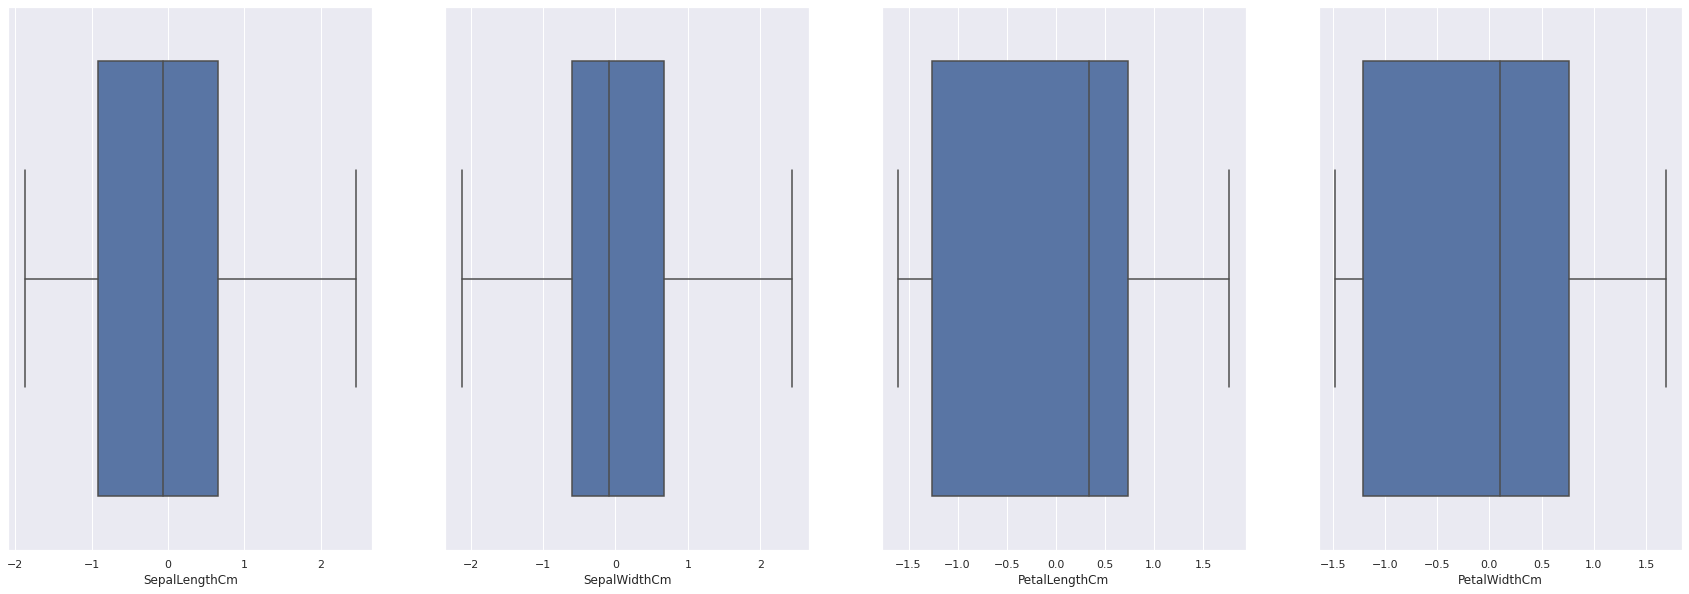

In [89]:
fig, axs = plt.subplots(ncols=4)
sns.set(rc={'figure.figsize':(30,10)})
sns.boxplot(x = "SepalLengthCm",data = data_baru2, ax=axs[0])
sns.boxplot(x = "SepalWidthCm", data = data_baru2, ax=axs[1])
sns.boxplot(x = "PetalLengthCm", data = data_baru2, ax=axs[2])
sns.boxplot(x = "PetalWidthCm", data = data_baru2, ax=axs[3])

Kurang lebihnya mohon dimaafkeun kak